# Logs

Wireline logs, and 1D data in general, are a fundamental data type for subsurface scientists and engineers.

The data themselves are usually some physical measurement: conductivity of rock, speed of sound, natural radiation counts, volume of fluid, and so on.

The data points also have a set of 'coordinates' in time or space. For a wireline log, the coordinates are depths; for production data, they are timestamps. Often, there are multiple sets of coordinates to worry about, such as MD, TVDSS, and TWT for wireline logs.

A lot of our work as scientists and engineers comes down to wrangling data like this. Let's look at some.

## Data from the F3 dataset

Let's start off by loading some well data, to do this, we'll use a `function` from [welly](https://code.agilescientific.com/welly/):

In [1]:
import pooch
from welly import Well

spot = pooch.create(path='./data_for_fcts', base_url="https://geocomp.s3.amazonaws.com/data/",
                    registry={"F02-1_logs.las": "md5:187cd72ca572f07f50af00c6090e9c40",
                             })

fname = spot.fetch('F02-1_logs.las')
w = Well.from_las(fname)
dt = list(w.data['DT'].values)
dt[:5]

[524.0485, 524.041, 524.0336, 524.0262, 524.019]

We have now loaded some data. We made an **assignment**, which means giving a name (`dt`) to a data structure (a `list` full of numbers in this case), so we can now inspect `dt`:

In [2]:
dt

[524.0485,
 524.041,
 524.0336,
 524.0262,
 524.019,
 524.0117,
 524.0042,
 523.9968,
 523.9893,
 523.9819,
 523.9745,
 523.9673,
 523.96,
 523.9526,
 523.9451,
 523.9377,
 523.9304,
 523.9229,
 523.9157,
 523.9084,
 523.9009,
 523.8935,
 523.886,
 523.8787,
 523.8712,
 523.864,
 523.8567,
 523.8492,
 523.8419,
 523.8344,
 523.827,
 523.8196,
 523.8121,
 523.8049,
 523.7976,
 523.7902,
 523.7828,
 523.7753,
 523.7679,
 523.7604,
 523.7532,
 523.746,
 523.7385,
 523.7311,
 523.7236,
 523.7162,
 523.7089,
 523.7015,
 523.6943,
 523.6869,
 523.6795,
 523.6721,
 523.6646,
 523.6572,
 523.6498,
 523.6427,
 523.6353,
 523.6279,
 523.6204,
 523.6129,
 523.6055,
 523.5981,
 523.5911,
 523.5836,
 523.5761,
 523.5686,
 523.5612,
 523.5538,
 523.5463,
 523.5392,
 523.5319,
 523.5244,
 523.517,
 523.5095,
 523.5021,
 523.4947,
 523.4873,
 523.4802,
 523.4727,
 523.4653,
 523.4579,
 523.4505,
 523.4431,
 523.4356,
 523.4285,
 523.4211,
 523.4137,
 523.4062,
 523.3988,
 523.3914,
 523.384,
 523.3768

As this is a very long log (how long in fact?), we'll just **slice** into the `list` to grab the first 10 values to learn about this data structure, the `list`:

In [3]:
len(dt)

9680

In [4]:
# Slicing
dt[0:10]

[524.0485,
 524.041,
 524.0336,
 524.0262,
 524.019,
 524.0117,
 524.0042,
 523.9968,
 523.9893,
 523.9819]

In [5]:
# Saving the slice
dt_ten = dt[0:10]
dt_ten

[524.0485,
 524.041,
 524.0336,
 524.0262,
 524.019,
 524.0117,
 524.0042,
 523.9968,
 523.9893,
 523.9819]

Notice that, for now, there are no coordinates, only the data.

This thing now exists in memory, with the name `dt_ten` pointing at it. We can ask to see it:

In [6]:
dt_ten

[524.0485,
 524.041,
 524.0336,
 524.0262,
 524.019,
 524.0117,
 524.0042,
 523.9968,
 523.9893,
 523.9819]

But we can't do 'mathy' things with it in a particularly easy way:

In [7]:
dt_ten + 10 

# This results in an error:

TypeError: can only concatenate list (not "int") to list

Later on we'll meet NumPy and see how its `ndarray` data structure can help us with this.

We can plot it though! We need a library for this, plotting is not built into the core of Python. (Most things aren't; the core of Python just contains a few fundamental tools.)

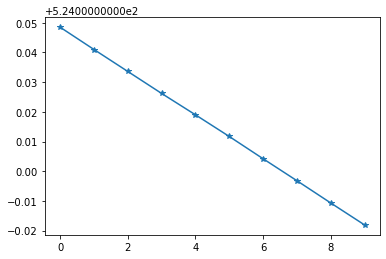

In [8]:
import matplotlib.pyplot as plt

plt.plot(dt_ten, '*-')

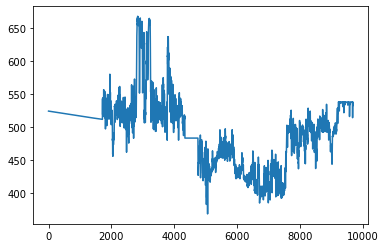

In [9]:
plt.plot(dt)

Another handy plot:

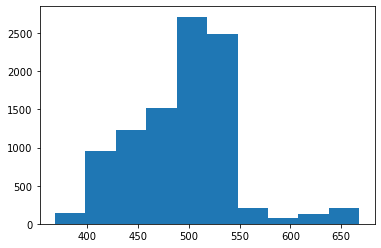

In [10]:
# And let's look at the whole data set too
_ = plt.hist(dt)

## Exercise

- Make a plot of the `dt` log only from index `4000` up to index `4100`.

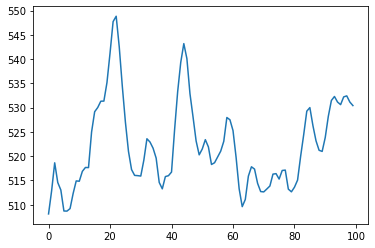

In [11]:
plt.plot(dt[4000:4100])

## What can `list` do?

This data structure has three important features:

- Its instances are sequences with concepts like length, membership, and iterability.
- Its instances are ordered collections that we can index and slice elements and subsequences from.
- Its instances have 'methods' attached to them, which are functions that access their data.

Let's explore!

In [12]:
dt_ten

[524.0485,
 524.041,
 524.0336,
 524.0262,
 524.019,
 524.0117,
 524.0042,
 523.9968,
 523.9893,
 523.9819]

In [13]:
# We'll talk about iterability in a minute.

# Length.
len(dt_ten)

10

In [14]:
# Membership.
42 in dt_ten

False

In [15]:
# Sortability.
sorted(dt_ten)  # Returns a copy, unlike list.sort() method.

[523.9819,
 523.9893,
 523.9968,
 524.0042,
 524.0117,
 524.019,
 524.0262,
 524.0336,
 524.041,
 524.0485]

In [16]:
# There's a built-in function to sum collections.
sum(dt_ten)

5240.1522

In [17]:
# Indexing.
dt_ten[0], dt_ten[3], dt_ten[11], dt_ten[-1]  # Explain why -1.

IndexError: list index out of range

In [18]:
# Slicing.
dt_ten[5:8]    # 8 - 5 = 3 items.
dt_ten[:10]    # The first 10.
dt_ten[1:]     # All except the first.
dt_ten[:-1]    # All except the last
dt_ten[:10:2]  # Every other of first ten

[524.0485, 524.0336, 524.019, 524.0042, 523.9893]

In [19]:
# Assignment by index (but not slice).
dt_ten[0] = 100
dt_ten

# This CHANGES item 0, does not insert new item at 0 (method for that).
# Mutability. Be careful with it, often better to make a new thing.

[100,
 524.041,
 524.0336,
 524.0262,
 524.019,
 524.0117,
 524.0042,
 523.9968,
 523.9893,
 523.9819]

In [20]:
# Methods.
dt_ten.index(100)

0

In [21]:
# Append is easily the most useful; works in place (lists are mutable).
dt_ten.append(50)
dt_ten

[100,
 524.041,
 524.0336,
 524.0262,
 524.019,
 524.0117,
 524.0042,
 523.9968,
 523.9893,
 523.9819,
 50]

## Exercise

For this exercise, use `dt_ten`.
- Omit the first and last value from `dt_ten`, **assign** the result to `dt_8`.
- In `dt_8`, remove the last value and save it as `last` (this should no longer be `50`)
- Print every third value in `dt_8`.

In [22]:
dt_8 = dt_ten[1:-1]

In [23]:
last = dt_8.pop()
assert last != 50

In [24]:
print(dt_8[::3])

[524.041, 524.019, 523.9968]


## Iterability

Often we'd lile to step over the items in a collection, transforming them or somehow using them as we go. For example, we might collect the transformed versions in a new list ("remove the endings from these filenames") or perhaps we'll loop over a list of URLs, making web requests to each one in turn and collecting the results.

In [25]:
# Iterability.
# Earlier on I tried to add 10 to the GR log.

# This is a `for` loop. Notice:
#  - No counters or increments.
#  - We get each `n` from `gr` in turn.
for n in dt_ten:
    print(n + 10)

110
534.041
534.0336
534.0262
534.019
534.0117
534.0042
533.9968
533.9893
533.9819
60


In [26]:
# dt hasn't changed:
dt_ten

[100,
 524.041,
 524.0336,
 524.0262,
 524.019,
 524.0117,
 524.0042,
 523.9968,
 523.9893,
 523.9819,
 50]

In [27]:
# `n` was an actual assignment happening for each step in `gr`:
n

50

In [28]:
# To 'save' the transformed numbers, I need to collect them in a new list.
dt_out = []
for n in dt_ten:
    dt_out.append(n + 10)
dt_out

[110,
 534.041,
 534.0336,
 534.0262,
 534.019,
 534.0117,
 534.0042,
 533.9968,
 533.9893,
 533.9819,
 60]

## `break` and `continue`

The data we loaded, the `dt` curve, have no missing data, but if we load the `gr` we can see that the first few values are all `nan` values, so called for "not a number":

In [29]:
gr = list(w.data['GR'].values)
gr[:10]

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [30]:
gr[10:20]

[nan, nan, nan, nan, 3.0703, 2.7441, 2.6564, 2.6521, 2.032, 1.7953]

So now if we want to iterate over these values, we need some control at each step of the iteration to check whether the value is valid, this is where `break` and `continue` can come in. First we'll use `numpy` to identify those `nan` values (we could also use the `math` library, but as `numpy` is the go-to library for all scientific computing in Python, we might as well get familiar with it:

In [31]:
import numpy as np

In [32]:
gr[0]

nan

In [33]:
# np.isnan returns a boolean value: True or False
np.isnan(42), np.isnan(gr[0])

(False, True)

## `if` statements

One of the most common places to see booleans is in `if` statements. These allow for different blocks of code to be run depending on the result of a check.

* Basic pattern
* `if` ... `else`
* `if` ... `elif` ... `else` - mutually exclusive options
* Combined with `for` ... `in` ... `:` to control iterations
    - `break`, `continue`

Let's look at an example with our `gr_all` data:

In [34]:
# build this up
print(f'Len of all data: {len(gr)}')

gr_clean = []
for g in gr:
    if np.isnan(g):
        print(f'Skipping value: {g}')
        continue
    else:
        gr_clean.append(g)
        
print(f'Len of cleaned data: {len(gr_clean)}')

Len of all data: 9680
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Skipping value: nan
Len of cleaned data: 9666


In [35]:
print(f'Len of all data: {len(gr)}')

for idx, g in enumerate(gr):
    if np.isnan(g):
        print(f'Bad value `{g}` at idx `{idx}`, interrupting.')
        break

Len of all data: 9680
Bad value `nan` at idx `0`, interrupting.


## Exercise

- First print each value in `gr_clean`.
- Next print only the first 15 values of `gr_clean`.
- Then modify your code again to only print values strictly smaller than `2`.
- Next add a condition to multiply values that are greater or equal to `2` by `10`, and print them.
- Finally, add a print statement to log that the loop is over.

In [36]:
for g in gr_clean[:15]:
    if g < 2:
        print(g)
    else:
        print(g * 10)

print('Loop finished.')

30.703
27.441
26.564
26.521
20.32
1.7953
1.4786
1.3392
1.3392
1.7285
29.567
40.153
44.301
47.036
48.807
Loop finished.


### Booleans

`bool`s are either `True` or `False`. These can be very useful, most obviously for selectively running particular blocks of code.

Boolean values can be obtained in a number of ways. Many functions or methods will return either `True` or `False`. Comparisons also return a `bool`:

| Equal to | Not equal to | Less than | Greater than | Less than or equal | Greater than or equal |
|----------|--------------|-----------|--------------|--------------------|-----------------------|
|   `==`   |     `!=`     |    `<`    |      `>`     |        `<=`        |          `>=`         |

Different types will never be equal (that is, something like `1 == '1'` is `False`). If you want to know if something is the same object as another, then you should use `is` and `is not`.

Some objects contain others (for example lists), and membership within a collection can be tested with `in`, which gives a `True` or `False`.

We can also link expressions that are True or False together in a few ways:

| Operation 	| Result                                                           	|
|-----------	|------------------------------------------------------------------	|
| a **or** b    	| True if either a or b is true                                    	|
| a **and** b   	| False if either a or b is false,<br>True if both a and b are true |
| **not** a     	| True if a is true, else False                                    	|

In some cases (notably with numpy arrays) `&` and `|` are used instead of `and` and `or`. `&` and `|` are bitwise operators: they are only used on numbers, and work at the level of individual 1s and 0s. In most cases you will want `and` and `or` instead.

#### Truthiness

Some things are considered to be "truthy" (and will count as `True`) while others are "falsey" (counting as `False`). Examples of things that are falsey are the following:
* `0`
* `0.0`
* empty collections (such as an empty list `[]`, and empty versions of the other datastructures that we will cover in this notebook but have not seen yet),
* empty strings (`''` or `""`).

Most other things will be truthy.

Here is a simple example, but play around with more:

```python
e_list = []

if e_list:
    print('True!')
else:
    print('False!')
    
f_list = [0]

if f_list:
    print('True!')
else:
    print('False!')
```

## Comprehensions

There's an optional extra bit of Python syntax that can sometimes help write more readable code. Any time you're doing some transformation on a collection like this, you can write it as a 'comprehension'. Let's start with a shorter subset of `gr` values:

In [37]:
dt_out = [n + 10 for n in dt_ten]
dt_out

[110,
 534.041,
 534.0336,
 534.0262,
 534.019,
 534.0117,
 534.0042,
 533.9968,
 533.9893,
 533.9819,
 60]

If you find that harder to read than the `for` loop, just ignore it. You'll love it one day, but it can wait!

## Exercise

 - Create a list of numbers.
 - Make a new list that contains only the second half of your list.
 - Can you sort your list from largest to smallest?
 - Find the sum of the squares of the numbers in your list.
 - Append three new numbers to your list. Can you do it in one step? <a title="You might need to Google how to concatenate lists in Python.">HINT</a>

In [38]:
# YOUR CODE HERE



In [39]:
# Possible solutions here.
my_list = [1, 4, 5, 7, 3, 47, 65, 51, 11, 52]
print(f'my_list: {my_list}')
my_range = np.random.randint(low=10, high=100, size=10)
print(f'my_range: {my_range}')
print(f'2nd half of list: {my_list[len(my_list)//2:]}')
print(f'reverse sorted list: {sorted(my_list, reverse=True)}')
sum_squares = sum([n**2 for n in my_list])
print(f'Sum of squares: {sum_squares}')
my_list.extend([345, 987, -999])
print(f'extended list: {my_list}')

my_list: [1, 4, 5, 7, 3, 47, 65, 51, 11, 52]
my_range: [89 53 44 94 76 62 62 62 78 87]
2nd half of list: [47, 65, 51, 11, 52]
reverse sorted list: [65, 52, 51, 47, 11, 7, 5, 4, 3, 1]
Sum of squares: 11960
extended list: [1, 4, 5, 7, 3, 47, 65, 51, 11, 52, 345, 987, -999]


## Math on a `list` vs `np.ndarray`:

Remember that we could not do this:

In [40]:
my_list + 10

TypeError: can only concatenate list (not "int") to list

In [41]:
np.array(my_list) + 10

array([  11,   14,   15,   17,   13,   57,   75,   61,   21,   62,  355,
        997, -989])

In [42]:
my_list * 2

[1,
 4,
 5,
 7,
 3,
 47,
 65,
 51,
 11,
 52,
 345,
 987,
 -999,
 1,
 4,
 5,
 7,
 3,
 47,
 65,
 51,
 11,
 52,
 345,
 987,
 -999]

In [43]:
np.array(my_list) * 2

array([    2,     8,    10,    14,     6,    94,   130,   102,    22,
         104,   690,  1974, -1998])

### Indexing and slicing `np.ndarray`

It is important to realize that everything you have learned about indexing and slicing on a `list` can be applied to a `np.ndarray`. Let's make one to illustrate:

In [44]:
arr = np.random.randint(low=10, high=100, size=50)
arr

array([81, 10, 26, 46, 52, 63, 74, 12, 59, 86, 63, 91, 76, 24, 92, 12, 56,
       64, 66, 95, 81, 31, 70, 39, 66, 97, 50, 49, 34, 11, 91, 56, 82, 57,
       15, 43, 68, 79, 13, 60, 52, 37, 71, 59, 45, 97, 36, 85, 44, 74])

In [45]:
arr[0], arr[-1]

(81, 74)

In [46]:
arr[10:40:2]

array([63, 76, 92, 56, 66, 81, 70, 66, 50, 34, 91, 82, 15, 68, 13])

In [47]:
tops = arr[:-1]
tops

array([81, 10, 26, 46, 52, 63, 74, 12, 59, 86, 63, 91, 76, 24, 92, 12, 56,
       64, 66, 95, 81, 31, 70, 39, 66, 97, 50, 49, 34, 11, 91, 56, 82, 57,
       15, 43, 68, 79, 13, 60, 52, 37, 71, 59, 45, 97, 36, 85, 44])

In [48]:
bases = arr[1:]
bases

array([10, 26, 46, 52, 63, 74, 12, 59, 86, 63, 91, 76, 24, 92, 12, 56, 64,
       66, 95, 81, 31, 70, 39, 66, 97, 50, 49, 34, 11, 91, 56, 82, 57, 15,
       43, 68, 79, 13, 60, 52, 37, 71, 59, 45, 97, 36, 85, 44, 74])

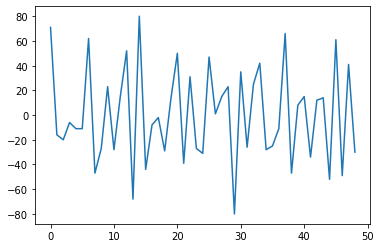

In [49]:
plt.plot(tops - bases)

## Handling `nan` values without a loop

When we wrote a loop to handle the `nan` values in `gr`, we actually needed `numpy` or the `math` library to identify the `nan` values, there is a shorter way to achieve the same results by leveraging `numpy`, for this we need `gr` to be a `np.ndarray` rather than a `list`, we can use typecasting to achieve this:

In [50]:
gr_arr = np.array(gr)
gr_arr[:25]

array([   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan, 3.0703, 2.7441,
       2.6564, 2.6521, 2.032 , 1.7953, 1.4786, 1.3392, 1.3392, 1.7285,
       2.9567])

In [51]:
# Use numpy to filter out the nans
gr_arr = gr_arr[~np.isnan(gr_arr)]
print(type(gr_arr))
gr_arr[:15]

<class 'numpy.ndarray'>


array([3.0703, 2.7441, 2.6564, 2.6521, 2.032 , 1.7953, 1.4786, 1.3392,
       1.3392, 1.7285, 2.9567, 4.0153, 4.4301, 4.7036, 4.8807])

## Boolean array

What is going on here `gr_arr[~np.isnan(gr_arr)]`!?
Let's break it down to understand it:

In [52]:
empty_arr = np.array([])
empty_arr

array([], dtype=float64)

In [53]:
test_arr   = np.array([1, 2, 3, 4, 5])
test_bools = np.array([True, True, False, True, False])
test_arr, test_bools

(array([1, 2, 3, 4, 5]), array([ True,  True, False,  True, False]))

In [54]:
# contiguous slicing
test_arr[0:3]

array([1, 2, 3])

In [55]:
# discontiguous slicing based on boolean array
test_arr[test_bools]

array([1, 2, 4])

In [56]:
# adding nan values
test_gr = np.array([np.nan, 120, 80, 90, np.nan, 115, 90])
test_gr

array([ nan, 120.,  80.,  90.,  nan, 115.,  90.])

In [57]:
np.isnan(test_gr[0])

True

In [58]:
np.isnan(test_gr)

array([ True, False, False, False,  True, False, False])

In [59]:
test_gr[np.isnan(test_gr)]

array([nan, nan])

In [60]:
~np.isnan(test_gr)

array([False,  True,  True,  True, False,  True,  True])

In [61]:
test_gr[~np.isnan(test_gr)]

array([120.,  80.,  90., 115.,  90.])

## Wrapping up

So we've loaded a well log, we've modified it, looped over it, controlled the flow of our python programm, let's now finish by simply plotting it using `welly`:

<AxesSubplot:title={'center':'GR'}, xlabel='API'>

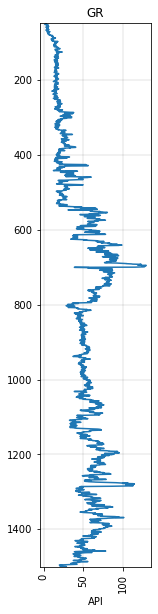

In [62]:
w.data['GR'].plot()

## NEXT

To continue and do more meaningful processing on data like this,

- We're going to need one more data type (dictionaries).
- We're going to have to learn how to write our own functions.
- We'll practise making our own plots.
- We'll look at file I/O.

There's plenty more python to learn!